# ***Parte1: Exploracion,Transformacion y limpieza de datos***
###a. Cargue de datos y Revision del contenido de cada una de las tablas
###b. Preprocesamiento de tablas (Tratamiento de los datos nulos e invalidos, eliminacion de Columnas y filas no relevantes)

##a. Cargue de datos y Revision del contenido de cada una de las tablas

In [ ]:
# Carga de librerias a emplear

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Habilitar acceso al google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Carga de los archivos de interes como dataFrames de Pandas

# Carga de archivos base desde el drive de Francia
Datos_Ordenes_Compra = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto/POData.csv')
Informacion_Carriles=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto/Network_-_.csv')
Informacion_Bodegas=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Proyecto/SGWarehouses.xlsx',sheet_name='WH Adresses')

# # Carga de archivos base desde el drive de Carlos
# Datos_Ordenes_Compra = pd.read_csv('/content/drive/MyDrive/ESP_BigData/GYADD/Proyecto/POData.csv')
# Informacion_Carriles=pd.read_csv('/content/drive/MyDrive/ESP_BigData/GYADD/Proyecto/Network_-_.csv')
# Informacion_Bodegas=pd.read_excel('/content/drive/MyDrive/ESP_BigData/GYADD/Proyecto/SGWarehouses.xlsx',sheet_name='WH Adresses')

<ipython-input-36-bd0e2a0b1288>:4: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  Datos_Ordenes_Compra = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto/POData.csv')
<ipython-input-36-bd0e2a0b1288>:5: DtypeWarning: Columns (21,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  Informacion_Carriles=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto/Network_-_.csv')


In [ ]:
#Longitud archivos
print(Datos_Ordenes_Compra.shape)
print(Informacion_Carriles.shape)
print(Informacion_Bodegas.shape)
print(Datos_Ordenes_Compra_Copia_Cons.shape)

(86519, 71)
(23687, 11)
(43, 13)
(72786, 41)


In [ ]:
# Revision inicial archivo ordenes de compra
Datos_Ordenes_Compra

,RUN_DATE,PO,OrderNumber,LoadNum,Carrier,OriginCity,OriginState,OriginCountry,OriginName,GoodsSupplier,...,ID2ndLegDropDepart,CALC_DROPDATE_MULTILEG,CALC_2LEG_TRANSIT,ID2ndLegVia,ID2ndLegMode,ID2ndLegTempControlled,ID2ndLegStopCount,FulfillByDate,FulfilledByUser,GR_Qty
0,8/28/2023,3371549,2.374739e+08,70399647.0,WESTERN CARRIERS INC,NORTH BERGEN,NJ,USA,EDI_100033_WESTERN NJ 83,701531.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/2/2023,COLE TRUANT: COLE.TRUANT@PERNOD-RICARD.COM,948
1,8/28/2023,3440659,2.317915e+08,69492526.0,WESTERN CARRIERS INC- 1ST LEG,NORTH BERGEN,NJ,USA,WESTERN CARRIERS NJ 2220 91 BLDG 5,701271.0,...,1/18/2023,1/18/2023,5.0,"NORTH BERGEN, NJ",TL-RT53,Yes,2.0,1/14/2023,LLOYD PERALTA: LPERALTA@MHWLTD.COM,56
2,8/28/2023,3440693,2.317792e+08,69421203.0,G3 ENTERPRISES INC,WOODRIDGE,IL,USA,EDI_104522_CHICAGO RDC IL,700287.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/31/2022,AUTO FULFILL:,1368
3,8/28/2023,3440712,2.321589e+08,69642754.0,SMITH TRANSPORTATION SERVICES INC,LEXINGTON,KY,USA,EDI_100478_CAMPARI LEX KY,701542.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/14/2023,CAMILLE DUNCAN: CAMILLE.DUNCAN@CAMPARI.COM,243
4,8/28/2023,3440727,2.318066e+08,69479467.0,WESTERN CARRIERS INC- 1ST LEG,NORTH BERGEN,NJ,USA,WESTERN CARRIERS NJ 2220 91 BLDG 5,701271.0,...,1/18/2023,1/18/2023,1.0,"NORTH BERGEN, NJ",TL-RT53,Yes,2.0,1/14/2023,DAISY HO: DAISY@CAPECLASSICS.COM,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86514,8/28/2023,3662648,2.334298e+09,74373514.0,SUPPLIER DELIVERED,ONTARIO,CA,USA,BIAGI BROS ONTARIO,701629.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/18/2023,AUTO FULFILL:,736
86515,8/28/2023,3656295,2.333059e+09,74255975.0,SUPPLIER DELIVERED,CARSON,CA,USA,EDI_NESTLE_DAMCO,700366.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/19/2023,AUTO FULFILL:,1014
86516,8/28/2023,3657060,2.333080e+09,74271866.0,SUPPLIER DELIVERED,BENICIA,CA,USA,BIAGI BROS BENICIA CA,701630.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/17/2023,AUTO FULFILL:,1946
86517,8/28/2023,3657063,2.333080e+09,74271884.0,SUPPLIER DELIVERED,BENICIA,CA,USA,BIAGI BROS BENICIA CA,701630.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/17/2023,AUTO FULFILL:,1748


In [ ]:
Datos_Ordenes_Compra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86519 entries, 0 to 86518
Data columns (total 71 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   RUN_DATE                                   86519 non-null  object 
 1   PO                                         86519 non-null  int64  
 2   OrderNumber                                80092 non-null  float64
 3   LoadNum                                    79968 non-null  float64
 4   Carrier                                    79968 non-null  object 
 5   OriginCity                                 86519 non-null  object 
 6   OriginState                                86515 non-null  object 
 7   OriginCountry                              86519 non-null  object 
 8   OriginName                                 86519 non-null  object 
 9   GoodsSupplier                              86432 non-null  object 
 10  SupplierNumber        

In [ ]:
Datos_Ordenes_Compra.describe()

,PO,OrderNumber,LoadNum,CALC_1LEG_TRANSIT,CALC_TOTAL_TRANSIT,RYDER_OriginalTransitDays,RYDER_ActualTransitDays,StopCount,Cases,Weight,Pallets,Value,OceanLFD,ID2ndLegLoad,CALC_2LEG_TRANSIT,ID2ndLegStopCount,GR_Qty
count,8.651900e+04,8.009200e+04,7.996800e+04,56960.000000,86519.000000,86519.000000,56088.000000,80165.000000,86519.000000,86519.00000,80014.000000,8.016500e+04,0.0,2.641400e+04,26264.000000,26414.000000,86519.000000
mean,3.538776e+06,1.778401e+09,7.184002e+07,3.945506,3.843306,21.431778,7.154828,2.213959,809.013974,23744.67664,0.001287,7.680791e+04,NaN,7.210765e+07,4.103830,2.015711,804.001399
std,5.798001e+04,9.146221e+08,1.270890e+06,6.659278,6.462812,17.967303,12.678460,0.530824,702.923285,18839.36251,0.222717,9.212303e+04,NaN,1.202363e+06,5.070421,0.130885,706.575855
min,3.371549e+06,2.317792e+08,6.938842e+07,-21.000000,-49.000000,-29.000000,-131.000000,1.000000,1.000000,0.02000,0.000000,0.000000e+00,NaN,6.809259e+07,-50.000000,1.000000,0.000000
25%,3.489112e+06,2.399278e+08,7.074541e+07,1.000000,0.000000,10.000000,1.000000,2.000000,80.000000,2208.00000,0.000000,9.240000e+03,NaN,7.112729e+07,1.000000,2.000000,79.000000
50%,3.537150e+06,2.316922e+09,7.178614e+07,1.000000,1.000000,18.000000,6.000000,2.000000,924.000000,32061.60000,0.000000,4.458200e+04,NaN,7.211137e+07,3.000000,2.000000,924.000000
75%,3.587022e+06,2.324283e+09,7.295530e+07,4.000000,5.000000,28.000000,12.000000,2.000000,1310.000000,42161.67000,0.000000,1.115630e+05,NaN,7.316475e+07,5.000000,2.000000,1300.000000
max,3.664810e+06,2.334414e+09,7.443550e+07,153.000000,153.000000,1131.000000,153.000000,6.000000,5419.000000,158125.16000,56.000000,5.300048e+06,NaN,7.440207e+07,78.000000,5.000000,31350.000000


In [ ]:
Informacion_Carriles

,*Source,Descr,U_INCO_TERM,*Dest,*TransMode,LoadTime,TransLeadTime,UnloadTime,Total Lead Time,OrderReviewCal,...,U_LT_VAR_FACTOR,U_EQUIPMENT_TYPE,U_NETWORKCAP_SW,U_TRANSMODECAP_SW,MustGoDays,LookAheadDays,U_CREATED_BY,U_CREATED_DT,U_CHANGED_BY,U_CHANGED_DT
0,100000-701271,A HARDY/USA LIMITED-WESTERN NJ 2220 91 BLDG 5,DDP,5601-BULK,0-43500-WEIGHT,15D,24D,1D,40D,ORC-100000-701271,...,0.0,TV,False,False,NaN,NaN,SCPOMGR,8/17/2018,mariabetancourt@sgws.com:Job-189044,6/30/2023
1,100000-702579,A HARDY/USA LIMITED-A HARDY/USA LIMITED CHICAGO,DDP,5601-BULK,0-43500-WEIGHT,14D,13D,1D,28D,ORC-100000-702579,...,0.0,TV,False,False,NaN,NaN,SCPOMGR,8/17/2018,mariabetancourt@sgws.com:Job-189044,6/30/2023
2,100003-700074,A V BRANDS DBA RAVENTOS CODORNIU-ARTESIA WINERY C,DDP,2201-LOUI,0-43500-WEIGHT,5D,46D,1D,52D,VAC-FPI,...,0.0,TF,False,False,NaN,NaN,Node-176568:dwest:Job-430772,9/18/2020,lsilva@sgws.com,8/28/2023
3,100003-700074,A V BRANDS DBA RAVENTOS CODORNIU-ARTESIA WINERY C,DDP,2501-BULK,0-43500-WEIGHT,5D,38D,1D,44D,ORC-100003-700074,...,0.0,TF,False,False,NaN,NaN,Node-176568:dwest:Job-430772,9/18/2020,saibalabhagavathi.raghavan@sgws.com:Job-197329,8/4/2023
4,100003-700074,A V BRANDS DBA RAVENTOS CODORNIU-ARTESIA WINERY C,DDP,3201-COLU,0-43500-WEIGHT,5D,38D,1D,44D,VAC-FPI,...,0.0,TF,False,False,NaN,NaN,SCPOMGR,3/15/2019,lsilva@sgws.com,8/28/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23744,8704-1000,San Antonio,NaN,8702-1000,FTL-18-PLLT-36000-WEIGHT-1200-CASES,5D,2D,2D,9D,VAC-MDO,...,0.0,NaN,False,True,NaN,NaN,WebWORKS:jhogarth,7/8/2020,STGMGR,9/1/2023
23745,9201-1000,Saint Rose,NaN,9202-1000,FTL-26-PLLT-39500-WEIGHT,5D,4D,2D,11D,ORC-9201-1000,...,0.0,NaN,False,True,NaN,NaN,WebWORKS:lupegui,1/27/2021,STGMGR,9/1/2023
23746,9202-1000,Lafayette,NaN,9201-1000,FTL-26-PLLT-39500-WEIGHT,5D,4D,2D,11D,ORC-9202-1000,...,0.0,NaN,False,True,NaN,NaN,WebWORKS:lupegui,1/27/2021,STGMGR,9/1/2023
23747,9501-1000,Kansas City,NaN,9502-1000,0-600-CASES,5D,1D,2D,8D,ORC-9501-1000,...,0.0,NaN,False,True,NaN,NaN,WebWORKS:lupegui,2/26/2021,STGMGR,9/1/2023


In [ ]:
Informacion_Carriles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23749 entries, 0 to 23748
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   *Source                    23749 non-null  object 
 1   Descr                      23749 non-null  object 
 2   U_INCO_TERM                23687 non-null  object 
 3   *Dest                      23749 non-null  object 
 4   *TransMode                 23749 non-null  object 
 5   LoadTime                   23743 non-null  object 
 6   TransLeadTime              23749 non-null  object 
 7   UnloadTime                 23749 non-null  object 
 8   Total Lead Time            23749 non-null  object 
 9   OrderReviewCal             23749 non-null  object 
 10  ShipCal                    23749 non-null  object 
 11  ArrivCal                   23749 non-null  object 
 12  VendorMinRule              23749 non-null  int64  
 13  LoadBuildRule              23749 non-null  int

In [ ]:
Informacion_Carriles.describe()

,VendorMinRule,LoadBuildRule,LoadMinimumRule,LoadTolerance,TransModeMinRule,LoadSeqRule,LoadBuildAdjDownTolerance,PrimaryLSRule,SecondaryLSRule,FwdBuyEffectPct,U_LT_VAR_FACTOR
count,23749.000000,23749.000000,23749.000000,23749.000000,23749.000000,23749.0,23749.000000,23749.000000,23749.0,23749.0,23749.000000
mean,1.000379,1.242663,1.242705,0.387511,1.778475,1.0,99.976075,1.003790,1.0,100.0,0.029693
std,0.019464,0.614536,0.614622,1.316554,0.415282,0.0,1.416921,0.163348,0.0,0.0,0.082495
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.0,0.000000,1.000000,1.0,100.0,0.000000
25%,1.000000,1.000000,1.000000,0.000000,2.000000,1.0,100.000000,1.000000,1.0,100.0,0.000000
50%,1.000000,1.000000,1.000000,0.000000,2.000000,1.0,100.000000,1.000000,1.0,100.0,0.000000
75%,1.000000,1.000000,1.000000,0.000000,2.000000,1.0,100.000000,1.000000,1.0,100.0,0.000000
max,2.000000,3.000000,3.000000,50.000000,2.000000,1.0,100.000000,9.000000,1.0,100.0,0.386000


In [ ]:
Informacion_Carriles.head(2)

,*Source,Descr,U_INCO_TERM,*Dest,*TransMode,LoadTime,TransLeadTime,UnloadTime,Total Lead Time,OrderReviewCal,...,U_LT_VAR_FACTOR,U_EQUIPMENT_TYPE,U_NETWORKCAP_SW,U_TRANSMODECAP_SW,MustGoDays,LookAheadDays,U_CREATED_BY,U_CREATED_DT,U_CHANGED_BY,U_CHANGED_DT
0,100000-701271,A HARDY/USA LIMITED-WESTERN NJ 2220 91 BLDG 5,DDP,5601-BULK,0-43500-WEIGHT,15D,24D,1D,40D,ORC-100000-701271,...,0.0,TV,False,False,NaN,NaN,SCPOMGR,8/17/2018,mariabetancourt@sgws.com:Job-189044,6/30/2023
1,100000-702579,A HARDY/USA LIMITED-A HARDY/USA LIMITED CHICAGO,DDP,5601-BULK,0-43500-WEIGHT,14D,13D,1D,28D,ORC-100000-702579,...,0.0,TV,False,False,NaN,NaN,SCPOMGR,8/17/2018,mariabetancourt@sgws.com:Job-189044,6/30/2023


In [ ]:
Informacion_Carriles.tail(2)

,*Source,Descr,U_INCO_TERM,*Dest,*TransMode,LoadTime,TransLeadTime,UnloadTime,Total Lead Time,OrderReviewCal,...,U_LT_VAR_FACTOR,U_EQUIPMENT_TYPE,U_NETWORKCAP_SW,U_TRANSMODECAP_SW,MustGoDays,LookAheadDays,U_CREATED_BY,U_CREATED_DT,U_CHANGED_BY,U_CHANGED_DT
23747,9501-1000,Kansas City,NaN,9502-1000,0-600-CASES,5D,1D,2D,8D,ORC-9501-1000,...,0.0,NaN,False,True,NaN,NaN,WebWORKS:lupegui,2/26/2021,STGMGR,9/1/2023
23748,9502-1000,St. Charles,NaN,9501-1000,0-600-CASES,5D,2D,2D,9D,ORC-9502-1000,...,0.0,NaN,False,True,NaN,NaN,WebWORKS:lupegui,2/26/2021,STGMGR,9/1/2023


In [ ]:
Informacion_Bodegas

,DEST,Plant-Desc,Description,MULTIPLE DIVISION,Abrev.,division,Street,City,Postal Code,Region,Country,"Jackson, MS 39203",Desc LT
0,1401-BULK,1401-Florida,Florida,FL/SC,FL,FL,4400 OLD TAMPA HIGHWAY,LAKELAND,33811,FL,US,East,"Lakeland, FL"
1,2201-LOUI,2201-Kentucky,Kentucky,NO,KY,KY,2801 CONSTANT COMMENT PLACE,LOUISVILLE,40299,KY,US,East,"Louisville, KY"
2,2501-BULK,2501-Indiana,Indiana,NO,IN,IN,3901 HANNA CIRCLE,INDIANAPOLIS,46241,IN,US,Central,"Greenwood, IN"
3,3201-COLU,3201-South Carolina,South Carolina,FL/SC,SC,SC,7600 RICHARD STREET,COLUMBIA,29209,SC,US,East,"Columbia, SC"
4,3501-BOLI,3501-Illinois,Illinois,NO,IL,IL,300 EAST CROSSROADS PARKWAY,BOLINGBROOK,60440,IL,US,Central,"Bolingbrook, IL"
5,4201-BULK,4201-Pennsylvania,Pennsylvania,NO,PA,PA,536 JONES BLVD,POTTSTOWN,19464,PA,US,East,"Pennsylvania, PA"
6,4501-LIND,4501-New York-Linden,New York-Linden,NEW YORK,NY,NY-L,801 West Linden Avenue,Linden,7036,NJ,US,East,"Linden, NY"
7,4501-METR,4501-New York-Syosset,New York-Syosset,NEW YORK,NY,NY-M,345 UNDERHILL BLVD,SYOSSET,11791,NY,US,East,"Syosset, NY"
8,4601-SL01,4601-New York-Syracuse,New York-Syracuse,NEW YORK,NY,NY-U,3063 COURT STREET,SYRACUSE,13208,NY,US,East,"Syracuse, NY"
9,5101-1000,5101-Ohio-Columbus,Ohio-Columbus,OHIO,OH,OH-CO,4800 PORTH ROAD,COLUMBUS,43213,OH,US,East,"Columbus, OH"


In [ ]:
Informacion_Bodegas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   DEST               43 non-null     object
 1   Plant-Desc         43 non-null     object
 2   Description        43 non-null     object
 3   MULTIPLE DIVISION  43 non-null     object
 4   Abrev.             43 non-null     object
 5   division           43 non-null     object
 6   Street             43 non-null     object
 7   City               43 non-null     object
 8   Postal Code        43 non-null     int64 
 9   Region             43 non-null     object
 10  Country            43 non-null     object
 11  Jackson, MS 39203  43 non-null     object
 12  Desc LT            43 non-null     object
dtypes: int64(1), object(12)
memory usage: 4.5+ KB


##b. Preprocesamiento de tablas (Tratamiento de los datos nulos e invalidos, eliminacion de Columnas y filas no relevantes)


* En este apartado se da inicio con la preparacion de las tablas, mediante la inclusion de nuevos campos que seran valores unicos para el cruce de informacion a la tabla de consolidacion, ademas de la eliminacion de columnas y filas mediante criterios de uso y alcance del proyecto.

# Tabla de informacion de Carriles


In [ ]:
# Preparacion del dataframe Informacion_Carriles para crear una llave de identificacion para posteriores cruces
# Se creara una columna donde se concatenara los campos *Source_Dest, esta sera la nueva primera columna.
Informacion_Carriles.insert(0,'Source_Dest',Informacion_Carriles['*Source']+Informacion_Carriles['*Dest'])

In [ ]:
Informacion_Carriles.head(2)

,Source_Dest,*Source,Descr,U_INCO_TERM,*Dest,*TransMode,LoadTime,TransLeadTime,UnloadTime,Total Lead Time,...,U_LT_VAR_FACTOR,U_EQUIPMENT_TYPE,U_NETWORKCAP_SW,U_TRANSMODECAP_SW,MustGoDays,LookAheadDays,U_CREATED_BY,U_CREATED_DT,U_CHANGED_BY,U_CHANGED_DT
0,100000-7012715601-BULK,100000-701271,A HARDY/USA LIMITED-WESTERN NJ 2220 91 BLDG 5,DDP,5601-BULK,0-43500-WEIGHT,15D,24D,1D,40D,...,0.0,TV,False,False,NaN,NaN,SCPOMGR,8/17/2018,mariabetancourt@sgws.com:Job-189044,6/30/2023
1,100000-7025795601-BULK,100000-702579,A HARDY/USA LIMITED-A HARDY/USA LIMITED CHICAGO,DDP,5601-BULK,0-43500-WEIGHT,14D,13D,1D,28D,...,0.0,TV,False,False,NaN,NaN,SCPOMGR,8/17/2018,mariabetancourt@sgws.com:Job-189044,6/30/2023


In [ ]:
IC_forma1=Informacion_Carriles.shape

In [ ]:
# Cuando un carril es definido para transferencia interna de inventario (movimientos entre bodegas propias) carecera de Incoterm
# Para el analisis de TLT que compete, estos registros no se tienen en cuenta y pueden ser eliminados de la tabla
# Para esta limpieza se buscara en ese campo, los NA y se eliminaran.
Informacion_Carriles=Informacion_Carriles[Informacion_Carriles['U_INCO_TERM'].notna()]

In [ ]:
IC_forma2=Informacion_Carriles.shape
print(f"Se eliminaron {IC_forma1[0]-IC_forma2[0]} lineas del archivo de informacion carriles que eran transferencias internas de la compania")

Se eliminaron 62 lineas del archivo de informacion carriles que eran transferencias internas de la compania


In [ ]:
# Los parametros de lead time, estan dados como una combinacion de caracteres, NumeroTexto donde la unidad de tiempo
#se representa con una letra al final.
# Ejemplo 15D indica 15 dias, para realizar calculos y analisis se debe eliminar la D y convertir en valores enteros.

Informacion_Carriles['LoadTime']=Informacion_Carriles['LoadTime'].str.replace('D','').astype(int)
Informacion_Carriles['TransLeadTime']=Informacion_Carriles['TransLeadTime'].str.replace('D','').astype(int)
Informacion_Carriles['UnloadTime']=Informacion_Carriles['UnloadTime'].str.replace('D','').astype(int)
Informacion_Carriles['Total Lead Time']=Informacion_Carriles['Total Lead Time'].str.replace('D','').astype(int)

<ipython-input-53-aab6515aef96>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Informacion_Carriles['LoadTime']=Informacion_Carriles['LoadTime'].str.replace('D','').astype(int)
<ipython-input-53-aab6515aef96>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Informacion_Carriles['TransLeadTime']=Informacion_Carriles['TransLeadTime'].str.replace('D','').astype(int)
<ipython-input-53-aab6515aef96>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [ ]:
# Chequeo/validacion de cambios de tipo de dato entero
print(type(Informacion_Carriles['Total Lead Time'][100]))
Informacion_Carriles.head(2)

<class 'numpy.int64'>


,Source_Dest,*Source,Descr,U_INCO_TERM,*Dest,*TransMode,LoadTime,TransLeadTime,UnloadTime,Total Lead Time,...,U_LT_VAR_FACTOR,U_EQUIPMENT_TYPE,U_NETWORKCAP_SW,U_TRANSMODECAP_SW,MustGoDays,LookAheadDays,U_CREATED_BY,U_CREATED_DT,U_CHANGED_BY,U_CHANGED_DT
0,100000-7012715601-BULK,100000-701271,A HARDY/USA LIMITED-WESTERN NJ 2220 91 BLDG 5,DDP,5601-BULK,0-43500-WEIGHT,15,24,1,40,...,0.0,TV,False,False,NaN,NaN,SCPOMGR,8/17/2018,mariabetancourt@sgws.com:Job-189044,6/30/2023
1,100000-7025795601-BULK,100000-702579,A HARDY/USA LIMITED-A HARDY/USA LIMITED CHICAGO,DDP,5601-BULK,0-43500-WEIGHT,14,13,1,28,...,0.0,TV,False,False,NaN,NaN,SCPOMGR,8/17/2018,mariabetancourt@sgws.com:Job-189044,6/30/2023


In [ ]:
# No todas las columnas de este data frame son necesarias para el analisis
#inicialmente se listaran para identificar cuales deben ser depuradas.
columnas_Info_carriles=Informacion_Carriles.columns
columnas_Info_carriles

Index(['Source_Dest', '*Source', 'Descr', 'U_INCO_TERM', '*Dest', '*TransMode',
       'LoadTime', 'TransLeadTime', 'UnloadTime', 'Total Lead Time',
       'OrderReviewCal', 'ShipCal', 'ArrivCal', 'VendorMinRule',
       'LoadBuildRule', 'LoadMinimumRule', 'LoadTolerance', 'TransModeMinRule',
       'LoadSeqRule', 'LoadBuildAdjUpTolerance', 'LoadBuildAdjDownTolerance',
       'PrimaryLSRule', 'PrimaryLSDur', 'SecondaryLSRule', 'SKUPerPalletSw',
       'AutoApprovalProfile', 'AutoApprovalSw', 'U_FWDBUY_LOADTIME_SW',
       'FwdBuyActiveDur', 'FwdBuyEffectPct', 'U_LT_VAR_FACTOR',
       'U_EQUIPMENT_TYPE', 'U_NETWORKCAP_SW', 'U_TRANSMODECAP_SW',
       'MustGoDays', 'LookAheadDays', 'U_CREATED_BY', 'U_CREATED_DT',
       'U_CHANGED_BY', 'U_CHANGED_DT'],
      dtype='object')

In [ ]:
# Seleccion de las columnas de interes de esta tabla
Informacion_Carriles=Informacion_Carriles[['Source_Dest', '*Source', 'Descr', 'U_INCO_TERM', '*Dest', '*TransMode','LoadTime', 'TransLeadTime', 'UnloadTime', 'Total Lead Time','LoadBuildRule']]

In [ ]:
# Verificacion de cambios
print(Informacion_Carriles.shape)
Informacion_Carriles.head(2)

(23687, 11)


,Source_Dest,*Source,Descr,U_INCO_TERM,*Dest,*TransMode,LoadTime,TransLeadTime,UnloadTime,Total Lead Time,LoadBuildRule
0,100000-7012715601-BULK,100000-701271,A HARDY/USA LIMITED-WESTERN NJ 2220 91 BLDG 5,DDP,5601-BULK,0-43500-WEIGHT,15,24,1,40,1
1,100000-7025795601-BULK,100000-702579,A HARDY/USA LIMITED-A HARDY/USA LIMITED CHICAGO,DDP,5601-BULK,0-43500-WEIGHT,14,13,1,28,1


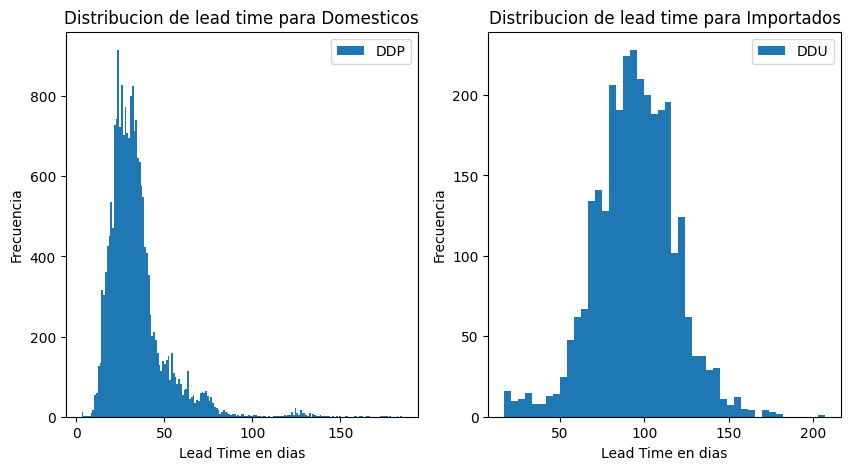

In [ ]:
# En esta tabla Se puede hacer una exploracion de como se distribuyen los lead time cargados
# Tipo importado o Domestico, se puede deducir del Incoterm. DDP: Domestico y DDU: Importado
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title('Distribucion de lead time para Domesticos')
plt.xlabel('Lead Time en dias')
plt.ylabel('Frecuencia')
plt.hist(Informacion_Carriles[Informacion_Carriles['U_INCO_TERM']=='DDP']['Total Lead Time'], bins='fd',label='DDP')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribucion de lead time para Importados')
plt.xlabel('Lead Time en dias')
plt.ylabel('Frecuencia')
plt.hist(Informacion_Carriles[Informacion_Carriles['U_INCO_TERM']=='DDU']['Total Lead Time'], bins='fd',label='DDU')
plt.legend()

plt.show()

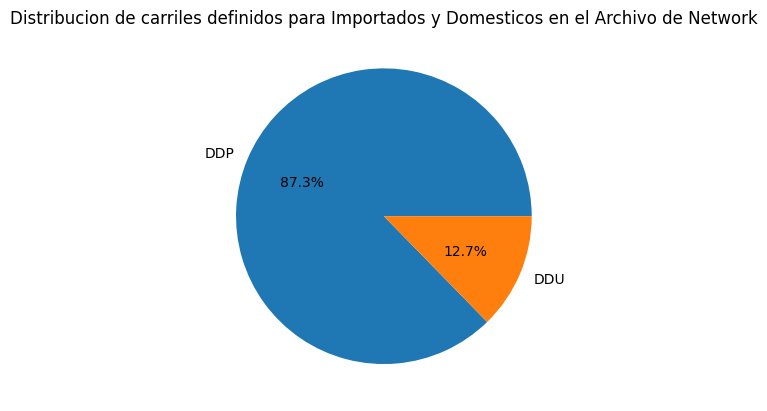

In [ ]:
# Se puede revisar cuantos carriles son para productos importados y cuantos son para domesticos con un grafico de torta
plt.pie(Informacion_Carriles['U_INCO_TERM'].value_counts(), labels=Informacion_Carriles['U_INCO_TERM'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribucion de carriles definidos para Importados y Domesticos en el Archivo de Network')
plt.show()

# Tabla de informacion de bodegas

In [ ]:
Informacion_Bodegas.head(2)

,DEST,Plant-Desc,Description,MULTIPLE DIVISION,Abrev.,division,Street,City,Postal Code,Region,Country,"Jackson, MS 39203",Desc LT
0,1401-BULK,1401-Florida,Florida,FL/SC,FL,FL,4400 OLD TAMPA HIGHWAY,LAKELAND,33811,FL,US,East,"Lakeland, FL"
1,2201-LOUI,2201-Kentucky,Kentucky,NO,KY,KY,2801 CONSTANT COMMENT PLACE,LOUISVILLE,40299,KY,US,East,"Louisville, KY"


In [ ]:
# Para validacion en el archivo principal se requerira la lista de ciudades del archivo de bodegas, este archivo sera necesario para poder identificar
# registros con ciudades erroneas que deben ser corregidos
Lista_Ciudades=Informacion_Bodegas['City'].unique()
Lista_Ciudades

array(['LAKELAND', 'LOUISVILLE', 'INDIANAPOLIS', 'COLUMBIA',
       'BOLINGBROOK', 'POTTSTOWN', 'Linden', 'SYOSSET', 'SYRACUSE',
       'COLUMBUS', 'GLENWILLOW', 'PHOENIX', 'BALTIMORE', 'NEW CASTLE',
       'SHAKOPEE', 'OMAHA', 'SANTA FE SPRINGS', 'UNION CITY', 'MAUI',
       'KAPOLEI', 'KAWAIHAE', 'KAUAI', 'LAS VEGAS', 'SPARKS',
       'ALBUQUERQUE', 'AURORA', 'PUYALLUP', 'WILSONVILLE', 'URBANDALE',
       'FARMERS BRANCH', 'KATY', 'SAN ANTONIO', 'SAINT ROSE', 'LAFAYETTE',
       'NORTH LITTLE ROCK', 'EDWARDSVILLE', 'KANSAS CITY',
       'SAINT CHARLES', 'TULSA', 'MEMPHIS'], dtype=object)

#Tabla de informacion de Ordenes de Compra (archivo principal)

In [ ]:
Datos_Ordenes_Compra.head(2)

,RUN_DATE,PO,OrderNumber,LoadNum,Carrier,OriginCity,OriginState,OriginCountry,OriginName,GoodsSupplier,...,ID2ndLegDropDepart,CALC_DROPDATE_MULTILEG,CALC_2LEG_TRANSIT,ID2ndLegVia,ID2ndLegMode,ID2ndLegTempControlled,ID2ndLegStopCount,FulfillByDate,FulfilledByUser,GR_Qty
0,8/28/2023,3371549,237473892.0,70399647.0,WESTERN CARRIERS INC,NORTH BERGEN,NJ,USA,EDI_100033_WESTERN NJ 83,701531.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/2/2023,COLE TRUANT: COLE.TRUANT@PERNOD-RICARD.COM,948
1,8/28/2023,3440659,231791498.0,69492526.0,WESTERN CARRIERS INC- 1ST LEG,NORTH BERGEN,NJ,USA,WESTERN CARRIERS NJ 2220 91 BLDG 5,701271.0,...,1/18/2023,1/18/2023,5.0,"NORTH BERGEN, NJ",TL-RT53,Yes,2.0,1/14/2023,LLOYD PERALTA: LPERALTA@MHWLTD.COM,56


In [ ]:
# Para el analisis se deben tener en cuenta solamente las ordenes de compra que han sido completadas
# estas se pueden identificar porque en la columna 'LoadStatus' tienen el valor de 'Closed'
total_POs=len(Datos_Ordenes_Compra['LoadStatus'])

In [ ]:
# Conteo cantidad de ordenes de compra con diferentes 'LoadStatus'
Num_por_LoadStatus=Datos_Ordenes_Compra['LoadStatus'].value_counts().sort_values(ascending=False)
Etiquetas_LoadStatus=Num_por_LoadStatus.index.to_numpy()
Valores_LoadStatus=Num_por_LoadStatus.to_numpy()
Num_por_LoadStatus # Mostrando conteos por 'LoadStatus'

Closed                                 83460
Delivered - 200 Leg                      982
Delivered                                917
Not Appted - CRSD At Risk                782
Not Picked Up - Appted- At Risk          119
Open                                      82
Pending Booking                           76
In Transit - At Risk                      48
Cancel                                    14
Not Appted - CRSD At Risk - 200 Leg       13
Vessel Arrival Dest Port                  12
Pending Tender                             6
DELIVERED - 200 Leg                        2
Departed Supplier - Not Sailed             2
Not Picked Up - Appted- On Time            1
Delivered - 100 Leg                        1
DELIVERED - 100 Leg                        1
In Transit - At Risk - 200 Leg             1
Name: LoadStatus, dtype: int64

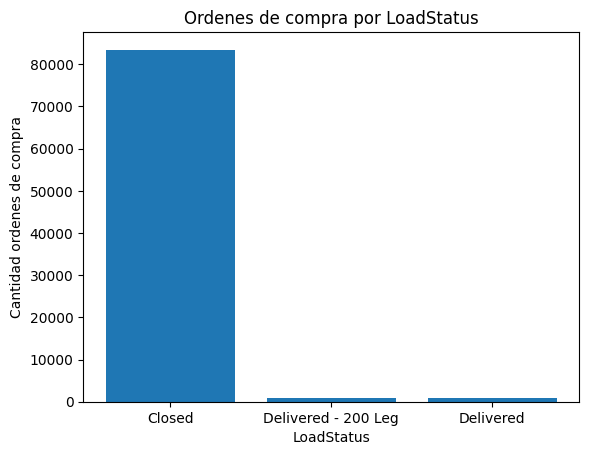

In [ ]:
# Revision grafica de la cantidad de ordenes de compra con diferentes 'LoadStatus'
# Create the bar plot
plt.bar(Etiquetas_LoadStatus[0:3], Valores_LoadStatus[0:3])
plt.title("Ordenes de compra por LoadStatus")
plt.xlabel("LoadStatus")
plt.ylabel("Cantidad ordenes de compra")
plt.show()

# *** Potencial mejora clasificar ordenes de compra close y non-close como un subgrupo ***

In [ ]:
# Creacion de una copia del dataframe para no afectar el original
Datos_Ordenes_Compra_Copia=Datos_Ordenes_Compra.copy()
Datos_Ordenes_Compra_Copia.head(2)

,RUN_DATE,PO,OrderNumber,LoadNum,Carrier,OriginCity,OriginState,OriginCountry,OriginName,GoodsSupplier,...,ID2ndLegDropDepart,CALC_DROPDATE_MULTILEG,CALC_2LEG_TRANSIT,ID2ndLegVia,ID2ndLegMode,ID2ndLegTempControlled,ID2ndLegStopCount,FulfillByDate,FulfilledByUser,GR_Qty
0,8/28/2023,3371549,237473892.0,70399647.0,WESTERN CARRIERS INC,NORTH BERGEN,NJ,USA,EDI_100033_WESTERN NJ 83,701531.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/2/2023,COLE TRUANT: COLE.TRUANT@PERNOD-RICARD.COM,948
1,8/28/2023,3440659,231791498.0,69492526.0,WESTERN CARRIERS INC- 1ST LEG,NORTH BERGEN,NJ,USA,WESTERN CARRIERS NJ 2220 91 BLDG 5,701271.0,...,1/18/2023,1/18/2023,5.0,"NORTH BERGEN, NJ",TL-RT53,Yes,2.0,1/14/2023,LLOYD PERALTA: LPERALTA@MHWLTD.COM,56
2,8/28/2023,3440693,231779184.0,69421203.0,G3 ENTERPRISES INC,WOODRIDGE,IL,USA,EDI_104522_CHICAGO RDC IL,700287.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/31/2022,AUTO FULFILL:,1368
3,8/28/2023,3440712,232158860.0,69642754.0,SMITH TRANSPORTATION SERVICES INC,LEXINGTON,KY,USA,EDI_100478_CAMPARI LEX KY,701542.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/14/2023,CAMILLE DUNCAN: CAMILLE.DUNCAN@CAMPARI.COM,243


In [ ]:
# Teniendo en cuenta que hubo un cambio de ubicacion de una bodega de Texas, se debe realizar la sustitucion en la base de datos de ordenes de compra,
# dado que esta contiene registros historicos con el nombre antiguo
Datos_Ordenes_Compra_Copia.DestinationCity.replace('FARMERS BRANCH', 'FORT WORTH', inplace=True)

In [ ]:
# Eliminar todos los registros donde la columna LoadStatus diferente a 'Closed' o lo que es lo mismo hacer un query solo de las lineas con LoadStatus == 'Closed'
Datos_Ordenes_Compra_Copia=Datos_Ordenes_Compra_Copia.query("LoadStatus=='Closed'")
Datos_Ordenes_Compra_Copia.head(4)

,RUN_DATE,PO,OrderNumber,LoadNum,Carrier,OriginCity,OriginState,OriginCountry,OriginName,GoodsSupplier,...,ID2ndLegDropDepart,CALC_DROPDATE_MULTILEG,CALC_2LEG_TRANSIT,ID2ndLegVia,ID2ndLegMode,ID2ndLegTempControlled,ID2ndLegStopCount,FulfillByDate,FulfilledByUser,GR_Qty
0,8/28/2023,3371549,237473892.0,70399647.0,WESTERN CARRIERS INC,NORTH BERGEN,NJ,USA,EDI_100033_WESTERN NJ 83,701531.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/2/2023,COLE TRUANT: COLE.TRUANT@PERNOD-RICARD.COM,948
1,8/28/2023,3440659,231791498.0,69492526.0,WESTERN CARRIERS INC- 1ST LEG,NORTH BERGEN,NJ,USA,WESTERN CARRIERS NJ 2220 91 BLDG 5,701271.0,...,1/18/2023,1/18/2023,5.0,"NORTH BERGEN, NJ",TL-RT53,Yes,2.0,1/14/2023,LLOYD PERALTA: LPERALTA@MHWLTD.COM,56
2,8/28/2023,3440693,231779184.0,69421203.0,G3 ENTERPRISES INC,WOODRIDGE,IL,USA,EDI_104522_CHICAGO RDC IL,700287.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/31/2022,AUTO FULFILL:,1368
3,8/28/2023,3440712,232158860.0,69642754.0,SMITH TRANSPORTATION SERVICES INC,LEXINGTON,KY,USA,EDI_100478_CAMPARI LEX KY,701542.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/14/2023,CAMILLE DUNCAN: CAMILLE.DUNCAN@CAMPARI.COM,243


In [ ]:
ConteoPO1=len(Datos_Ordenes_Compra_Copia['GoodsSupplier']) # Antes de limpieza de POs internas
print(ConteoPO1)

83460


In [ ]:
Datos_Ordenes_Compra_Copia

,RUN_DATE,PO,OrderNumber,LoadNum,Carrier,OriginCity,OriginState,OriginCountry,OriginName,GoodsSupplier,...,ID2ndLegDropDepart,CALC_DROPDATE_MULTILEG,CALC_2LEG_TRANSIT,ID2ndLegVia,ID2ndLegMode,ID2ndLegTempControlled,ID2ndLegStopCount,FulfillByDate,FulfilledByUser,GR_Qty
0,8/28/2023,3371549,2.374739e+08,70399647.0,WESTERN CARRIERS INC,NORTH BERGEN,NJ,USA,EDI_100033_WESTERN NJ 83,701531.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2/2/2023,COLE TRUANT: COLE.TRUANT@PERNOD-RICARD.COM,948
1,8/28/2023,3440659,2.317915e+08,69492526.0,WESTERN CARRIERS INC- 1ST LEG,NORTH BERGEN,NJ,USA,WESTERN CARRIERS NJ 2220 91 BLDG 5,701271.0,...,1/18/2023,1/18/2023,5.0,"NORTH BERGEN, NJ",TL-RT53,Yes,2.0,1/14/2023,LLOYD PERALTA: LPERALTA@MHWLTD.COM,56
2,8/28/2023,3440693,2.317792e+08,69421203.0,G3 ENTERPRISES INC,WOODRIDGE,IL,USA,EDI_104522_CHICAGO RDC IL,700287.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/31/2022,AUTO FULFILL:,1368
3,8/28/2023,3440712,2.321589e+08,69642754.0,SMITH TRANSPORTATION SERVICES INC,LEXINGTON,KY,USA,EDI_100478_CAMPARI LEX KY,701542.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1/14/2023,CAMILLE DUNCAN: CAMILLE.DUNCAN@CAMPARI.COM,243
4,8/28/2023,3440727,2.318066e+08,69479467.0,WESTERN CARRIERS INC- 1ST LEG,NORTH BERGEN,NJ,USA,WESTERN CARRIERS NJ 2220 91 BLDG 5,701271.0,...,1/18/2023,1/18/2023,1.0,"NORTH BERGEN, NJ",TL-RT53,Yes,2.0,1/14/2023,DAISY HO: DAISY@CAPECLASSICS.COM,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86514,8/28/2023,3662648,2.334298e+09,74373514.0,SUPPLIER DELIVERED,ONTARIO,CA,USA,BIAGI BROS ONTARIO,701629.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/18/2023,AUTO FULFILL:,736
86515,8/28/2023,3656295,2.333059e+09,74255975.0,SUPPLIER DELIVERED,CARSON,CA,USA,EDI_NESTLE_DAMCO,700366.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/19/2023,AUTO FULFILL:,1014
86516,8/28/2023,3657060,2.333080e+09,74271866.0,SUPPLIER DELIVERED,BENICIA,CA,USA,BIAGI BROS BENICIA CA,701630.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/17/2023,AUTO FULFILL:,1946
86517,8/28/2023,3657063,2.333080e+09,74271884.0,SUPPLIER DELIVERED,BENICIA,CA,USA,BIAGI BROS BENICIA CA,701630.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/17/2023,AUTO FULFILL:,1748


In [ ]:
# Hay ordenes de compra generadas para representar los movimientos internos entre bodegas de la compania, las cuales no son objeto del informe
# Estas se pueden identificar porque en los campos 'GoodsSuplier' tienen 9 caracteres o tienen el valor 'NULL'
Datos_Ordenes_Compra_Copia = Datos_Ordenes_Compra_Copia.dropna(subset=["GoodsSupplier"])
Datos_Ordenes_Compra_Copia=Datos_Ordenes_Compra_Copia.drop(Datos_Ordenes_Compra_Copia[Datos_Ordenes_Compra_Copia['GoodsSupplier'].str.len()==9].index)
ConteoPO2=len(Datos_Ordenes_Compra_Copia['GoodsSupplier'])
print(f"Se eliminarons {ConteoPO1 - ConteoPO2} registros de Ordenes de Compra")

Se eliminarons 87 registros de Ordenes de Compra


In [ ]:
# De la inspeccion de los datos se observo que GoodsSupplier fue leido como numero flotante hay que corregir y convertir a string. Despues de la depuracion anterior
print(type(Datos_Ordenes_Compra_Copia['SupplierNumber'][100]))
print(type(Datos_Ordenes_Compra_Copia['GoodsSupplier'][100]))
print(Datos_Ordenes_Compra_Copia['GoodsSupplier'][100])
Datos_Ordenes_Compra_Copia['GoodsSupplier']=Datos_Ordenes_Compra_Copia['GoodsSupplier'].astype(int).astype(str)
Datos_Ordenes_Compra_Copia['SupplierNumber']=Datos_Ordenes_Compra_Copia['SupplierNumber'].astype(str)
print(type(Datos_Ordenes_Compra_Copia['SupplierNumber'][100]))
print(type(Datos_Ordenes_Compra_Copia['GoodsSupplier'][100]))
print(Datos_Ordenes_Compra_Copia['GoodsSupplier'][100])

<class 'int'>
<class 'float'>
702681.0
<class 'str'>
<class 'str'>
702681


In [ ]:
# Listado de columnas del dataframe para identificar las columnas a eliminar
print(Datos_Ordenes_Compra_Copia.columns)

Index(['RUN_DATE', 'PO', 'OrderNumber', 'LoadNum', 'Carrier', 'OriginCity',
       'OriginState', 'OriginCountry', 'OriginName', 'GoodsSupplier',
       'SupplierNumber', 'Supplier', 'DestinationCity', 'DestinationState',
       'CreateDateTime', 'OriginalRSD', 'CurrentRSD', 'OriginalRDD',
       'CurrentRDD', 'PickAppt', 'PickArrived', 'PickDepart',
       'CALC_PICKDATE_1LEG', 'DropAppt', 'DropArrived', 'DropDepart',
       'CALC_DROPDATE_1LEG', 'CALC_1LEG_TRANSIT', 'FulfilledDate',
       'TenderInitialDate', 'TenderAcceptedDate',
       'Time it took for carrier to accept the PO', 'GR_Date', 'LoadStatus',
       'MultiLeg', 'CALC_TOTAL_TRANSIT', 'RYDER_OriginalTransitDays',
       'RYDER_ActualTransitDays', 'StopCount', 'Cases', 'Weight', 'Pallets',
       'Value', 'TermsType', 'POType', 'CarrierCode', 'Mode', 'TempControlled',
       'OceanLFD', 'SpotBid', 'CALC_MULTI_LEG_CHECK', 'ID2ndLegLoad',
       'ID2ndOriginCity', 'ID2ndOriginState', 'ID2ndLegCarrier',
       'ID2ndLegStatu

In [ ]:
# Codigo para preguntarle al usuario que columnas desea eliminar y retorna el vector
# Lista_Columnas_Borrar=[]
# for columna in Datos_Ordenes_Compra_Copia.columns:
#   decision=input(f"Desea eliminar la columna: {columna} (si/no)?")
#   if decision.lower()=='si':
#     Lista_Columnas_Borrar.append(columna)
# print(Lista_Columnas_Borrar)

In [ ]:
# Lista_Columnas_Borrar

In [ ]:
# Copia de resultado despues de preguntar al usuario
Lista_Columnas_Borrar=['RUN_DATE',
 'OrderNumber',
 'LoadNum',
 'Carrier',
 'OriginalRSD',
 'OriginalRDD',
 'PickAppt',
 'PickArrived',
 'CALC_PICKDATE_1LEG',
 'DropAppt',
 'DropArrived',
 'DropDepart',
 'CALC_DROPDATE_1LEG',
 'CALC_1LEG_TRANSIT',
 'TenderInitialDate',
 'TenderAcceptedDate',
 'Time it took for carrier to accept the PO',
 'CALC_TOTAL_TRANSIT',
 'RYDER_OriginalTransitDays',
 'RYDER_ActualTransitDays',
 'StopCount',
 'Weight',
 'Pallets',
 'Value',
 'POType',
 'CarrierCode',
 'Mode',
 'TempControlled',
 'OceanLFD',
 'SpotBid',
 'ID2ndLegLoad',
 'ID2ndOriginCity',
 'ID2ndOriginState',
 'ID2ndLegCarrier',
 'ID2ndLegStatus',
 'ID2ndLegPickAppt',
 'ID2ndLegPickArrived',
 'ID2ndLegDropAppt',
 'ID2ndLegDropArrived',
 'ID2ndLegDropDepart',
 'CALC_2LEG_TRANSIT',
 'ID2ndLegVia',
 'ID2ndLegMode',
 'ID2ndLegTempControlled',
 'ID2ndLegStopCount',
 'FulfillByDate',
 'FulfilledByUser',
 'GR_Qty']

In [ ]:
# Se eliminan las columnas que no son necesarias para el analisis
Datos_Ordenes_Compra_Copia=Datos_Ordenes_Compra_Copia.drop(Lista_Columnas_Borrar,axis=1)
Datos_Ordenes_Compra_Copia

,PO,OriginCity,OriginState,OriginCountry,OriginName,GoodsSupplier,SupplierNumber,Supplier,DestinationCity,DestinationState,...,PickDepart,FulfilledDate,GR_Date,LoadStatus,MultiLeg,Cases,TermsType,CALC_MULTI_LEG_CHECK,CALC_PICKDATE_MULTILEG,CALC_DROPDATE_MULTILEG
0,3371549,NORTH BERGEN,NJ,USA,EDI_100033_WESTERN NJ 83,701531,100033,PERNOD RICARD USA,BOLINGBROOK,IL,...,2/23/2023,2/15/2023,2/24/2023,Closed,NaN,948,Collect,N,NaN,NaN
1,3440659,NORTH BERGEN,NJ,USA,WESTERN CARRIERS NJ 2220 91 BLDG 5,701271,112257,BERTRANDS WINES/MHW LTD,LAS VEGAS,NV,...,1/6/2023,1/3/2023,1/18/2023,Closed,MULTI,56,Collect,Y,1/13/2023,1/18/2023
2,3440693,WOODRIDGE,IL,USA,EDI_104522_CHICAGO RDC IL,700287,104522,EJ GALLO WINERY,COLUMBUS,OH,...,1/10/2023,1/3/2023,1/5/2023,Closed,NaN,1368,Collect,N,NaN,NaN
3,3440712,LEXINGTON,KY,USA,EDI_100478_CAMPARI LEX KY,701542,100478,CAMPARI AMERICA,NEW CASTLE,DE,...,1/19/2023,1/11/2023,1/26/2023,Closed,NaN,243,Collect,N,NaN,NaN
4,3440727,NORTH BERGEN,NJ,USA,WESTERN CARRIERS NJ 2220 91 BLDG 5,701271,102571,CAPE CLASSICS,SAINT ROSE,LA,...,1/6/2023,1/3/2023,1/19/2023,Closed,MULTI,31,Collect,Y,1/17/2023,1/18/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86514,3662648,ONTARIO,CA,USA,BIAGI BROS ONTARIO,701629,100041,CROWN IMPORTS LLC,LAS VEGAS,NV,...,NaN,8/22/2023,8/24/2023,Closed,NaN,736,Prepaid,N,NaN,NaN
86515,3656295,CARSON,CA,USA,EDI_NESTLE_DAMCO,700366,114380,NESTLE USA IPW,SANTA FE SPRINGS,CA,...,NaN,8/17/2023,8/23/2023,Closed,NaN,1014,Prepaid,N,NaN,NaN
86516,3657060,BENICIA,CA,USA,BIAGI BROS BENICIA CA,701630,100041,CROWN IMPORTS LLC,SPARKS,NV,...,NaN,8/17/2023,8/23/2023,Closed,NaN,1946,Prepaid,N,NaN,NaN
86517,3657063,BENICIA,CA,USA,BIAGI BROS BENICIA CA,701630,100041,CROWN IMPORTS LLC,SPARKS,NV,...,NaN,8/17/2023,8/22/2023,Closed,NaN,1793,Prepaid,N,NaN,NaN


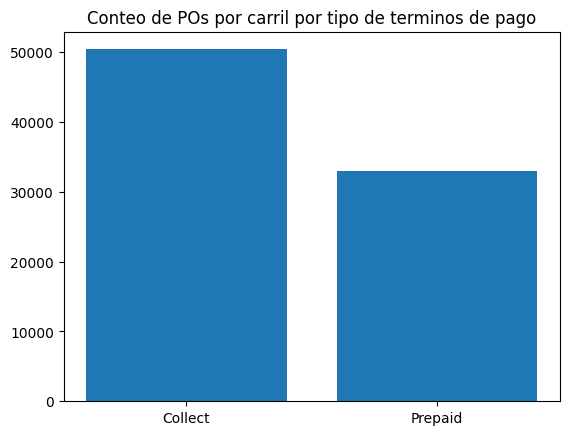

In [ ]:
# Conteo de numero de POs por carril por tipo de terminos de pago 'TermsType'
plt.bar(Datos_Ordenes_Compra_Copia['TermsType'].value_counts().index,Datos_Ordenes_Compra_Copia['TermsType'].value_counts())
plt.title("Conteo de POs por carril por tipo de terminos de pago")
plt.show()

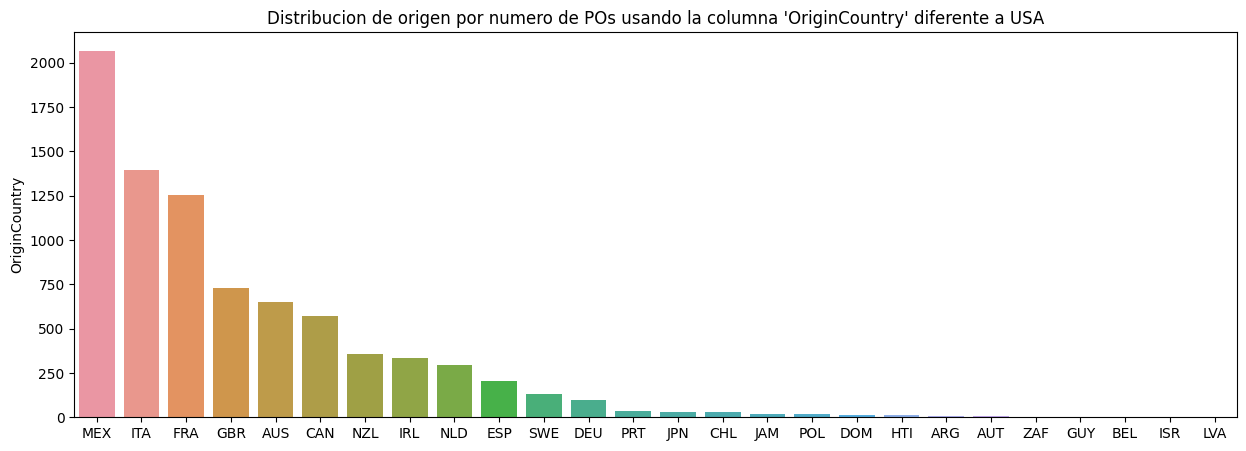

In [ ]:
# Distribucion de origen por numero de POs usando la columna 'OriginCountry' diferente a USA usando Seaborn
plt.subplots(figsize=(15,5))
sns.barplot(x=Datos_Ordenes_Compra_Copia[Datos_Ordenes_Compra_Copia['OriginCountry']!='USA']['OriginCountry'].value_counts().index,
        y=Datos_Ordenes_Compra_Copia[Datos_Ordenes_Compra_Copia['OriginCountry']!='USA']['OriginCountry'].value_counts())
plt.title("Distribucion de origen por numero de POs usando la columna 'OriginCountry' diferente a USA")
plt.show()

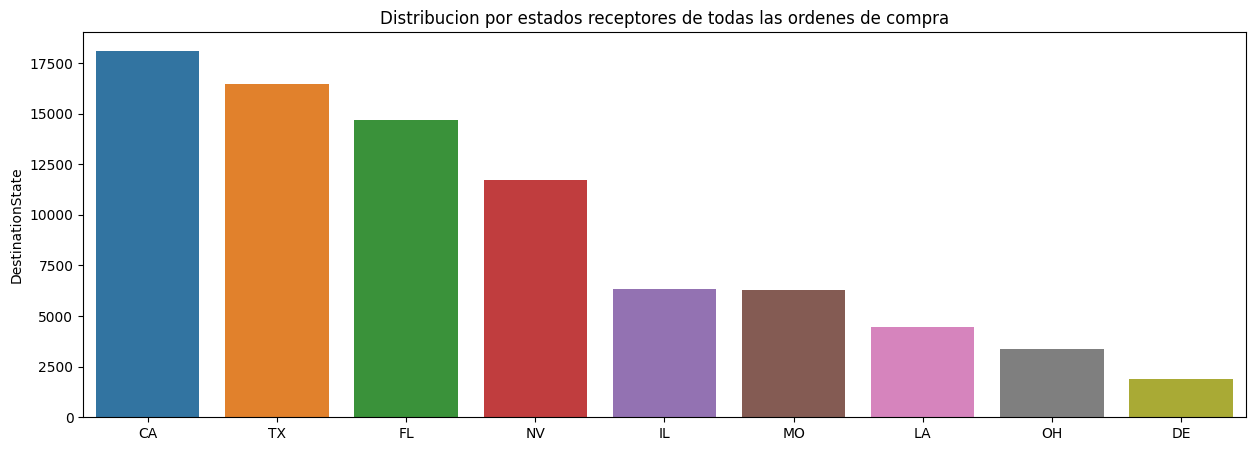

In [ ]:
# Distribucion por estados receptores de todas las ordenes de compra
plt.subplots(figsize=(15,5))
sns.color_palette("flare", as_cmap=True)
# sns.set(style='whitegrid',palette="flare",font="DejaVu Sans",font_scale=1)
sns.barplot(x=Datos_Ordenes_Compra_Copia['DestinationState'].value_counts().index,
        y=Datos_Ordenes_Compra_Copia['DestinationState'].value_counts())
plt.title("Distribucion por estados receptores de todas las ordenes de compra")
plt.show()

Los estados reportados son: ['IL' 'NV' 'OH' 'DE' 'LA' 'MO' 'FL' 'TX' 'CA']
Digite un estado de la lista anterior para mostrar la media y dispersion del numero de cajas por PO: CA


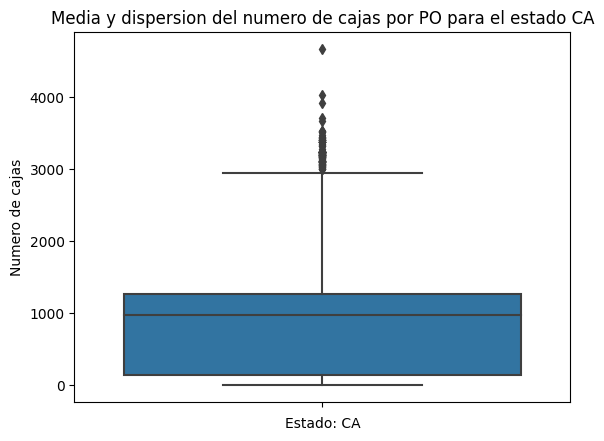

In [ ]:
# Mostrando la media y dispersion del numero de cajas por PO para las ordenes de compra por el estado que el usuario seleccione / Alternativa con Seaborn
Lista_estados=Datos_Ordenes_Compra_Copia['DestinationState'].unique()
print(f"Los estados reportados son: {Lista_estados}")
seleccion=input(f"Digite un estado de la lista anterior para mostrar la media y dispersion del numero de cajas por PO: ")

sns.boxplot(data=Datos_Ordenes_Compra_Copia[Datos_Ordenes_Compra_Copia['DestinationState']==seleccion],y='Cases')
plt.title(f"Media y dispersion del numero de cajas por PO para el estado {seleccion}")
plt.ylabel("Numero de cajas")
plt.xlabel(f"Estado: {seleccion}")
plt.show()

# Consolidacion y procesamiento para el calculo del TLT

# Generacion del reporte final

In [ ]:
#1. Para dar inicio a la consolidacion, se procede con el cruce de informacion a la base principal Datos_Ordenes_Compra_Copia
# concatenar en Datos_Ordenes_Compra_Copia SupplierNumber&'-"&GoodsSupplier
#3. Calculo del Total Lead Time (GR_Date-CreateDateTime),
#Desde Informacion_Carriles Total Lead Time
#Informacion_Bodegas cruzar el codigo de bodega
#2. Se deben concatenar datos para los calculos posteriores
## PO by Source, Average TLT By  Source, StDesvP by Source, LI Source, LS Source,
# identificar  "Outlier"/ "no Outlier"  - New Column "class"
#Cases by PO BY Source
# Class PO vs Avg Source  IF(BU2="Outlier","Null",IF(BM2<=BQ2,"PO<=Avg","PO>Avg"))
#load Time in days % porcentaje de Participacion criterio: Source, calcular # de dias en funcion de la proporcion y # de cajas

In [ ]:
Datos_Ordenes_Compra_Copia_Cons=Datos_Ordenes_Compra_Copia.copy()
Datos_Ordenes_Compra_Copia_Cons.head(2)

,PO,OriginCity,OriginState,OriginCountry,OriginName,GoodsSupplier,SupplierNumber,Supplier,DestinationCity,DestinationState,...,PickDepart,FulfilledDate,GR_Date,LoadStatus,MultiLeg,Cases,TermsType,CALC_MULTI_LEG_CHECK,CALC_PICKDATE_MULTILEG,CALC_DROPDATE_MULTILEG
0,3371549,NORTH BERGEN,NJ,USA,EDI_100033_WESTERN NJ 83,701531,100033,PERNOD RICARD USA,BOLINGBROOK,IL,...,2/23/2023,2/15/2023,2/24/2023,Closed,NaN,948,Collect,N,NaN,NaN
1,3440659,NORTH BERGEN,NJ,USA,WESTERN CARRIERS NJ 2220 91 BLDG 5,701271,112257,BERTRANDS WINES/MHW LTD,LAS VEGAS,NV,...,1/6/2023,1/3/2023,1/18/2023,Closed,MULTI,56,Collect,Y,1/13/2023,1/18/2023


In [ ]:
print(type(Datos_Ordenes_Compra_Copia_Cons['GR_Date'][0]))
print(type(Datos_Ordenes_Compra_Copia_Cons['CreateDateTime'][0]))

<class 'str'>
<class 'str'>


In [ ]:
Datos_Ordenes_Compra_Copia_Cons.head(2)

,PO,OriginCity,OriginState,OriginCountry,OriginName,GoodsSupplier,SupplierNumber,Supplier,DestinationCity,DestinationState,...,PickDepart,FulfilledDate,GR_Date,LoadStatus,MultiLeg,Cases,TermsType,CALC_MULTI_LEG_CHECK,CALC_PICKDATE_MULTILEG,CALC_DROPDATE_MULTILEG
0,3371549,NORTH BERGEN,NJ,USA,EDI_100033_WESTERN NJ 83,701531,100033,PERNOD RICARD USA,BOLINGBROOK,IL,...,2/23/2023,2/15/2023,2/24/2023,Closed,NaN,948,Collect,N,NaN,NaN
1,3440659,NORTH BERGEN,NJ,USA,WESTERN CARRIERS NJ 2220 91 BLDG 5,701271,112257,BERTRANDS WINES/MHW LTD,LAS VEGAS,NV,...,1/6/2023,1/3/2023,1/18/2023,Closed,MULTI,56,Collect,Y,1/13/2023,1/18/2023


In [ ]:
# concatenar en Datos_Ordenes_Compra_Copia SupplierNumber&'-"&GoodsSupplier
print(type(Datos_Ordenes_Compra_Copia_Cons['SupplierNumber'][0]))
print(type(Datos_Ordenes_Compra_Copia_Cons['GoodsSupplier'][0]))
Datos_Ordenes_Compra_Copia_Cons.insert(0,'*Source',(Datos_Ordenes_Compra_Copia_Cons['SupplierNumber']).astype(str)+'-'+Datos_Ordenes_Compra_Copia_Cons['GoodsSupplier'].astype(str))

<class 'str'>
<class 'str'>


In [ ]:
Datos_Ordenes_Compra_Copia_Cons.head(2)

,*Source,PO,OriginCity,OriginState,OriginCountry,OriginName,GoodsSupplier,SupplierNumber,Supplier,DestinationCity,...,PickDepart,FulfilledDate,GR_Date,LoadStatus,MultiLeg,Cases,TermsType,CALC_MULTI_LEG_CHECK,CALC_PICKDATE_MULTILEG,CALC_DROPDATE_MULTILEG
0,100033-701531,3371549,NORTH BERGEN,NJ,USA,EDI_100033_WESTERN NJ 83,701531,100033,PERNOD RICARD USA,BOLINGBROOK,...,2/23/2023,2/15/2023,2/24/2023,Closed,NaN,948,Collect,N,NaN,NaN
1,112257-701271,3440659,NORTH BERGEN,NJ,USA,WESTERN CARRIERS NJ 2220 91 BLDG 5,701271,112257,BERTRANDS WINES/MHW LTD,LAS VEGAS,...,1/6/2023,1/3/2023,1/18/2023,Closed,MULTI,56,Collect,Y,1/13/2023,1/18/2023


In [ ]:
len(Datos_Ordenes_Compra_Copia_Cons['*Source'])

83373

In [ ]:
len(Informacion_Bodegas['City'])

43

In [ ]:
#Informacion_Bodegas cruzar el codigo de bodega
# pruebadf=pd.merge(Datos_Ordenes_Compra_Copia_Cons,Informacion_Bodegas[['City','DEST']], left_on='DestinationCity',right_on='City',how="left")
Datos_Ordenes_Compra_Copia_Cons=pd.merge(Datos_Ordenes_Compra_Copia_Cons,Informacion_Bodegas[['City','DEST']], left_on='DestinationCity',right_on='City',how="left")

In [ ]:
len(Datos_Ordenes_Compra_Copia_Cons['*Source'])

83373

In [ ]:
Datos_Ordenes_Compra_Copia_Cons

,*Source,PO,OriginCity,OriginState,OriginCountry,OriginName,GoodsSupplier,SupplierNumber,Supplier,DestinationCity,...,GR_Date,LoadStatus,MultiLeg,Cases,TermsType,CALC_MULTI_LEG_CHECK,CALC_PICKDATE_MULTILEG,CALC_DROPDATE_MULTILEG,City,DEST
0,100033-701531,3371549,NORTH BERGEN,NJ,USA,EDI_100033_WESTERN NJ 83,701531,100033,PERNOD RICARD USA,BOLINGBROOK,...,2/24/2023,Closed,NaN,948,Collect,N,NaN,NaN,BOLINGBROOK,3501-BOLI
1,112257-701271,3440659,NORTH BERGEN,NJ,USA,WESTERN CARRIERS NJ 2220 91 BLDG 5,701271,112257,BERTRANDS WINES/MHW LTD,LAS VEGAS,...,1/18/2023,Closed,MULTI,56,Collect,Y,1/13/2023,1/18/2023,LAS VEGAS,7201-LASV
2,104522-700287,3440693,WOODRIDGE,IL,USA,EDI_104522_CHICAGO RDC IL,700287,104522,EJ GALLO WINERY,COLUMBUS,...,1/5/2023,Closed,NaN,1368,Collect,N,NaN,NaN,COLUMBUS,5101-1000
3,100478-701542,3440712,LEXINGTON,KY,USA,EDI_100478_CAMPARI LEX KY,701542,100478,CAMPARI AMERICA,NEW CASTLE,...,1/26/2023,Closed,NaN,243,Collect,N,NaN,NaN,NEW CASTLE,5401-BULK
4,102571-701271,3440727,NORTH BERGEN,NJ,USA,WESTERN CARRIERS NJ 2220 91 BLDG 5,701271,102571,CAPE CLASSICS,SAINT ROSE,...,1/19/2023,Closed,MULTI,31,Collect,Y,1/17/2023,1/18/2023,SAINT ROSE,9201-1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83368,100041-701629,3662648,ONTARIO,CA,USA,BIAGI BROS ONTARIO,701629,100041,CROWN IMPORTS LLC,LAS VEGAS,...,8/24/2023,Closed,NaN,736,Prepaid,N,NaN,NaN,LAS VEGAS,7201-LASV
83369,114380-700366,3656295,CARSON,CA,USA,EDI_NESTLE_DAMCO,700366,114380,NESTLE USA IPW,SANTA FE SPRINGS,...,8/23/2023,Closed,NaN,1014,Prepaid,N,NaN,NaN,SANTA FE SPRINGS,6201-STFE
83370,100041-701630,3657060,BENICIA,CA,USA,BIAGI BROS BENICIA CA,701630,100041,CROWN IMPORTS LLC,SPARKS,...,8/23/2023,Closed,NaN,1946,Prepaid,N,NaN,NaN,SPARKS,7202-SPAR
83371,100041-701630,3657063,BENICIA,CA,USA,BIAGI BROS BENICIA CA,701630,100041,CROWN IMPORTS LLC,SPARKS,...,8/22/2023,Closed,NaN,1793,Prepaid,N,NaN,NaN,SPARKS,7202-SPAR


In [ ]:
Datos_Ordenes_Compra_Copia_Cons.insert(0,'Source_Dest',(Datos_Ordenes_Compra_Copia_Cons['*Source'])+Datos_Ordenes_Compra_Copia_Cons['DEST'])

In [ ]:
Datos_Ordenes_Compra_Copia_Cons

,Source_Dest,*Source,PO,OriginCity,OriginState,OriginCountry,OriginName,GoodsSupplier,SupplierNumber,Supplier,...,GR_Date,LoadStatus,MultiLeg,Cases,TermsType,CALC_MULTI_LEG_CHECK,CALC_PICKDATE_MULTILEG,CALC_DROPDATE_MULTILEG,City,DEST
0,100033-7015313501-BOLI,100033-701531,3371549,NORTH BERGEN,NJ,USA,EDI_100033_WESTERN NJ 83,701531,100033,PERNOD RICARD USA,...,2/24/2023,Closed,NaN,948,Collect,N,NaN,NaN,BOLINGBROOK,3501-BOLI
1,112257-7012717201-LASV,112257-701271,3440659,NORTH BERGEN,NJ,USA,WESTERN CARRIERS NJ 2220 91 BLDG 5,701271,112257,BERTRANDS WINES/MHW LTD,...,1/18/2023,Closed,MULTI,56,Collect,Y,1/13/2023,1/18/2023,LAS VEGAS,7201-LASV
2,104522-7002875101-1000,104522-700287,3440693,WOODRIDGE,IL,USA,EDI_104522_CHICAGO RDC IL,700287,104522,EJ GALLO WINERY,...,1/5/2023,Closed,NaN,1368,Collect,N,NaN,NaN,COLUMBUS,5101-1000
3,100478-7015425401-BULK,100478-701542,3440712,LEXINGTON,KY,USA,EDI_100478_CAMPARI LEX KY,701542,100478,CAMPARI AMERICA,...,1/26/2023,Closed,NaN,243,Collect,N,NaN,NaN,NEW CASTLE,5401-BULK
4,102571-7012719201-1000,102571-701271,3440727,NORTH BERGEN,NJ,USA,WESTERN CARRIERS NJ 2220 91 BLDG 5,701271,102571,CAPE CLASSICS,...,1/19/2023,Closed,MULTI,31,Collect,Y,1/17/2023,1/18/2023,SAINT ROSE,9201-1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83368,100041-7016297201-LASV,100041-701629,3662648,ONTARIO,CA,USA,BIAGI BROS ONTARIO,701629,100041,CROWN IMPORTS LLC,...,8/24/2023,Closed,NaN,736,Prepaid,N,NaN,NaN,LAS VEGAS,7201-LASV
83369,114380-7003666201-STFE,114380-700366,3656295,CARSON,CA,USA,EDI_NESTLE_DAMCO,700366,114380,NESTLE USA IPW,...,8/23/2023,Closed,NaN,1014,Prepaid,N,NaN,NaN,SANTA FE SPRINGS,6201-STFE
83370,100041-7016307202-SPAR,100041-701630,3657060,BENICIA,CA,USA,BIAGI BROS BENICIA CA,701630,100041,CROWN IMPORTS LLC,...,8/23/2023,Closed,NaN,1946,Prepaid,N,NaN,NaN,SPARKS,7202-SPAR
83371,100041-7016307202-SPAR,100041-701630,3657063,BENICIA,CA,USA,BIAGI BROS BENICIA CA,701630,100041,CROWN IMPORTS LLC,...,8/22/2023,Closed,NaN,1793,Prepaid,N,NaN,NaN,SPARKS,7202-SPAR


In [ ]:
#Desde Informacion_Carriles Total Lead Time configurado en el sistema para la generacion de las PO
Datos_Ordenes_Compra_Copia_Cons=pd.merge(Datos_Ordenes_Compra_Copia_Cons,Informacion_Carriles[['Source_Dest','LoadTime','TransLeadTime','UnloadTime','Total Lead Time']],on='Source_Dest',how="left")

In [ ]:
# Identificar y eliminar los carriles de los datos historicos de las ordenes de compra que son carriles inactivos (ya no existen en la Network - Informacion Carriles -)
Datos_Ordenes_Compra_Copia_Cons[Datos_Ordenes_Compra_Copia_Cons['LoadTime'].isna()]
Datos_Ordenes_Compra_Copia_Cons = Datos_Ordenes_Compra_Copia_Cons[~Datos_Ordenes_Compra_Copia_Cons['LoadTime'].isnull()]

In [ ]:
#Calculo del Total Lead Time (GR_Date-CreateDateTime)
# Se ajusta primero el tipo de formato para las dos columnas, de manera que permita el calculo.
Datos_Ordenes_Compra_Copia_Cons['GR_Date']=pd.to_datetime(Datos_Ordenes_Compra_Copia_Cons['GR_Date'])
Datos_Ordenes_Compra_Copia_Cons['CreateDateTime']=pd.to_datetime(Datos_Ordenes_Compra_Copia_Cons['CreateDateTime'])

print(type(Datos_Ordenes_Compra_Copia_Cons['GR_Date'][0]))
print(type(Datos_Ordenes_Compra_Copia_Cons['CreateDateTime'][0]))

Datos_Ordenes_Compra_Copia_Cons['Total Lead Time(hist)']=Datos_Ordenes_Compra_Copia_Cons['GR_Date']-Datos_Ordenes_Compra_Copia_Cons['CreateDateTime']

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
# Se van a identificar los outliers con el siguiente criterio: Para cada lane ('Source&Dest') se analizaran todos los Total Lead Time calculados ('Total Lead Time(hist)')
# Y se clasificaran como outliers aquellos que sobrepasen valores  = media +- 1.15*(desviacion standard), es decir 87.49%

# Determinacion de la medias y desviaciones de los agrupados por lane ('Source&Dest')
Datos_Ordenes_Compra_Copia_Cons['Total Lead Time(hist)']=Datos_Ordenes_Compra_Copia_Cons['Total Lead Time(hist)'].dt.days.astype(float) # Transformando tipo dato fecha a flotante
medias_TLT=Datos_Ordenes_Compra_Copia_Cons.groupby('Source_Dest')['Total Lead Time(hist)'].mean().to_frame() # Genera la serie con las medias agrupadas y lo convierte en dataframe
medias_TLT=medias_TLT.rename(columns={"Total Lead Time(hist)":"Media_TLT_lane"}) # Renombrar el nombre de la columna
Datos_Ordenes_Compra_Copia_Cons=pd.merge(Datos_Ordenes_Compra_Copia_Cons,medias_TLT[['Media_TLT_lane']], on='Source_Dest',how="left") # Consolidacion y agregando la media/lane del TLT
Datos_Ordenes_Compra_Copia_Cons.head(4)

,Source_Dest,*Source,PO,OriginCity,OriginState,OriginCountry,OriginName,GoodsSupplier,SupplierNumber,Supplier,...,CALC_PICKDATE_MULTILEG,CALC_DROPDATE_MULTILEG,City,DEST,LoadTime,TransLeadTime,UnloadTime,Total Lead Time,Total Lead Time(hist),Media_TLT_lane
0,100033-7015313501-BOLI,100033-701531,3371549,NORTH BERGEN,NJ,USA,EDI_100033_WESTERN NJ 83,701531,100033,PERNOD RICARD USA,...,NaN,NaN,BOLINGBROOK,3501-BOLI,10.0,12.0,1.0,23.0,10.0,19.903509
1,112257-7012717201-LASV,112257-701271,3440659,NORTH BERGEN,NJ,USA,WESTERN CARRIERS NJ 2220 91 BLDG 5,701271,112257,BERTRANDS WINES/MHW LTD,...,1/13/2023,1/18/2023,LAS VEGAS,7201-LASV,10.0,18.0,1.0,29.0,15.0,39.666667
2,104522-7002875101-1000,104522-700287,3440693,WOODRIDGE,IL,USA,EDI_104522_CHICAGO RDC IL,700287,104522,EJ GALLO WINERY,...,NaN,NaN,COLUMBUS,5101-1000,1.0,1.0,1.0,3.0,2.0,5.072917
3,100478-7015425401-BULK,100478-701542,3440712,LEXINGTON,KY,USA,EDI_100478_CAMPARI LEX KY,701542,100478,CAMPARI AMERICA,...,NaN,NaN,NEW CASTLE,5401-BULK,8.0,10.0,1.0,19.0,23.0,22.952381


In [ ]:
# Determinacion de la desviacion estandard agrupados por lane ('Source&Dest')
numero_desv_estandar=1.15
std_TLT=Datos_Ordenes_Compra_Copia_Cons.groupby('Source_Dest')['Total Lead Time(hist)'].std(ddof=0).to_frame() # ddof=0 aplica desviacion estandard poblacional
std_TLT=std_TLT.rename(columns={"Total Lead Time(hist)":"Std_TLT_lane"}) # Renombrar el nombre de la columna
Datos_Ordenes_Compra_Copia_Cons=pd.merge(Datos_Ordenes_Compra_Copia_Cons,std_TLT[['Std_TLT_lane']], on='Source_Dest',how="left") # Consolidacion y agregando la media/lane del TLT
Datos_Ordenes_Compra_Copia_Cons['Std_TLT_lane']=Datos_Ordenes_Compra_Copia_Cons['Std_TLT_lane']*numero_desv_estandar
Datos_Ordenes_Compra_Copia_Cons.head(4)

,Source_Dest,*Source,PO,OriginCity,OriginState,OriginCountry,OriginName,GoodsSupplier,SupplierNumber,Supplier,...,CALC_DROPDATE_MULTILEG,City,DEST,LoadTime,TransLeadTime,UnloadTime,Total Lead Time,Total Lead Time(hist),Media_TLT_lane,Std_TLT_lane
0,100033-7015313501-BOLI,100033-701531,3371549,NORTH BERGEN,NJ,USA,EDI_100033_WESTERN NJ 83,701531,100033,PERNOD RICARD USA,...,NaN,BOLINGBROOK,3501-BOLI,10.0,12.0,1.0,23.0,10.0,19.903509,9.905529
1,112257-7012717201-LASV,112257-701271,3440659,NORTH BERGEN,NJ,USA,WESTERN CARRIERS NJ 2220 91 BLDG 5,701271,112257,BERTRANDS WINES/MHW LTD,...,1/18/2023,LAS VEGAS,7201-LASV,10.0,18.0,1.0,29.0,15.0,39.666667,38.501631
2,104522-7002875101-1000,104522-700287,3440693,WOODRIDGE,IL,USA,EDI_104522_CHICAGO RDC IL,700287,104522,EJ GALLO WINERY,...,NaN,COLUMBUS,5101-1000,1.0,1.0,1.0,3.0,2.0,5.072917,3.905410
3,100478-7015425401-BULK,100478-701542,3440712,LEXINGTON,KY,USA,EDI_100478_CAMPARI LEX KY,701542,100478,CAMPARI AMERICA,...,NaN,NEW CASTLE,5401-BULK,8.0,10.0,1.0,19.0,23.0,22.952381,11.375987


In [ ]:
# Identificacion de los outliers
# La condicion para determinar los outliers es determinar si el TLT esta por debajo del limite inferior (media+1.15std) o por encima del limite superior (media+1.15std)
Datos_Ordenes_Compra_Copia_Cons.insert(len(Datos_Ordenes_Compra_Copia_Cons.columns),'TLT_Outlier',(Datos_Ordenes_Compra_Copia_Cons['Total Lead Time(hist)']<(Datos_Ordenes_Compra_Copia_Cons['Media_TLT_lane']-Datos_Ordenes_Compra_Copia_Cons['Std_TLT_lane']))|(Datos_Ordenes_Compra_Copia_Cons['Total Lead Time(hist)']>(Datos_Ordenes_Compra_Copia_Cons['Media_TLT_lane']+Datos_Ordenes_Compra_Copia_Cons['Std_TLT_lane'])))

In [ ]:
# Se filtra el dataframe para seguir operando solo con datos que no son outliers
Datos_Ordenes_Compra_Copia_Cons['TLT_hist_no_outlier'] = Datos_Ordenes_Compra_Copia_Cons.loc[~Datos_Ordenes_Compra_Copia_Cons['TLT_Outlier'], 'Total Lead Time(hist)']
Datos_Ordenes_Compra_Copia_Cons['Cajas_no_outlier'] = Datos_Ordenes_Compra_Copia_Cons.loc[~Datos_Ordenes_Compra_Copia_Cons['TLT_Outlier'], 'Cases']

In [ ]:
# Calculo de cajas agrupadas por carril (lane)
suma_cajas=Datos_Ordenes_Compra_Copia_Cons.groupby('Source_Dest')['Cajas_no_outlier'].sum().to_frame() # Genera la serie con las medias agrupadas y lo convierte en dataframe
suma_cajas=suma_cajas.rename(columns={"Cajas_no_outlier":"SumCajas_no_outlier"}) # Renombrar el nombre de la columna
Datos_Ordenes_Compra_Copia_Cons=pd.merge(Datos_Ordenes_Compra_Copia_Cons,suma_cajas[['SumCajas_no_outlier']], on='Source_Dest',how="left") # Consolidacion y agregando la media/lane del TLT

In [ ]:
# Calculo del TLT ponderado
Datos_Ordenes_Compra_Copia_Cons['TLT_ponderado']=Datos_Ordenes_Compra_Copia_Cons['Cajas_no_outlier']*Datos_Ordenes_Compra_Copia_Cons['TLT_hist_no_outlier']/Datos_Ordenes_Compra_Copia_Cons['SumCajas_no_outlier']

In [ ]:
# Determinacion del TLT propuesto
tlt_propuesto=Datos_Ordenes_Compra_Copia_Cons.groupby('Source_Dest')['TLT_ponderado'].sum().to_frame() # Genera la serie con las medias agrupadas y lo convierte en dataframe
tlt_propuesto=tlt_propuesto.rename(columns={"TLT_ponderado":"TLT_propuesto"}) # Renombrar el nombre de la columna
Datos_Ordenes_Compra_Copia_Cons=pd.merge(Datos_Ordenes_Compra_Copia_Cons,tlt_propuesto[['TLT_propuesto']], on='Source_Dest',how="left") # Consolidacion y agregando la media/lane del TLT
Datos_Ordenes_Compra_Copia_Cons['TLT_propuesto']=Datos_Ordenes_Compra_Copia_Cons['TLT_propuesto'].apply(np.ceil)

In [ ]:
Datos_Ordenes_Compra_Copia_Cons.head(20)

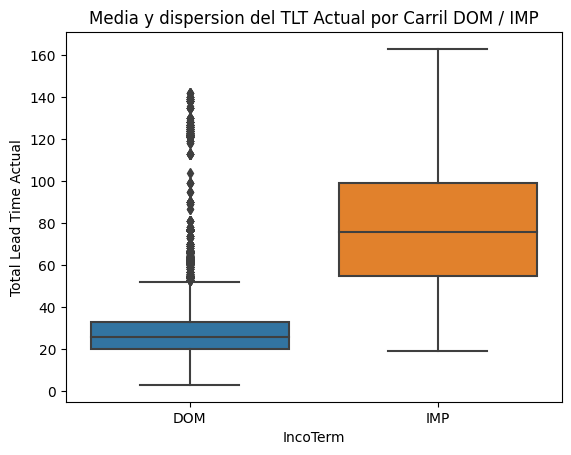

In [ ]:
# Mostrando la media y dispersion del numero de cajas por PO para las ordenes de compra por Incoterm DOM/IMP

Datos_Ordenes_Compra_Copia_Cons["Class_Pais"] = Datos_Ordenes_Compra_Copia_Cons["OriginCountry"] != "USA"

Datos_Ordenes_Compra_Copia_Cons["Class_Pais"].replace(False, "DOM", inplace=True)
Datos_Ordenes_Compra_Copia_Cons["Class_Pais"].replace(True, "IMP", inplace=True)

sns.boxplot(data=Datos_Ordenes_Compra_Copia_Cons, x ="Class_Pais", y="Total Lead Time")

plt.title("Media y dispersion del TLT Actual por Carril DOM / IMP")
plt.ylabel("Total Lead Time Actual")
plt.xlabel("IncoTerm")
plt.show()

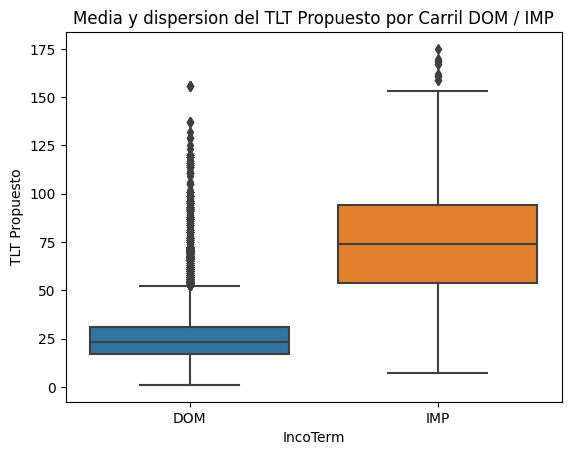

In [ ]:
# Mostrando la media y dispersion del numero de cajas por PO para las ordenes de compra por Incoterm DOM/IMP

Datos_Ordenes_Compra_Copia_Cons["Class_Pais"] = Datos_Ordenes_Compra_Copia_Cons["OriginCountry"] != "USA"

Datos_Ordenes_Compra_Copia_Cons["Class_Pais"].replace(False, "DOM", inplace=True)
Datos_Ordenes_Compra_Copia_Cons["Class_Pais"].replace(True, "IMP", inplace=True)

sns.boxplot(data=Datos_Ordenes_Compra_Copia_Cons, x ="Class_Pais", y="TLT_propuesto")

plt.title("Media y dispersion del TLT Propuesto por Carril DOM / IMP")
plt.ylabel("TLT Propuesto")
plt.xlabel("IncoTerm")
plt.show()

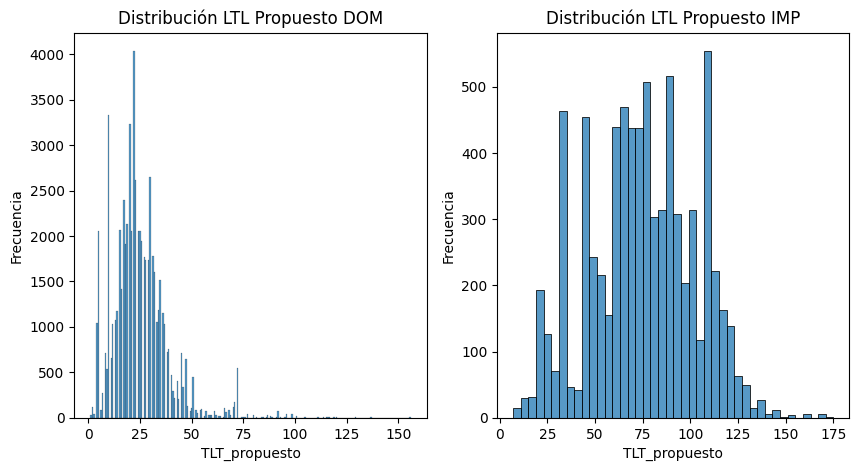

In [ ]:
# Crear el histogramas por cada Incoterm (Domestico e importado)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Histograma "DOM"
plt.subplot(1,2,1)
sns.histplot(data=Datos_Ordenes_Compra_Copia_Cons[Datos_Ordenes_Compra_Copia_Cons['Class_Pais']=='DOM'], x='TLT_propuesto', ax=axes[0])
plt.title("Distribución LTL Propuesto DOM")
plt.xlabel("TLT_propuesto")
plt.ylabel('Frecuencia')

# Histograma "IMP"
plt.subplot(1,2,2)
sns.histplot(data=Datos_Ordenes_Compra_Copia_Cons[Datos_Ordenes_Compra_Copia_Cons['Class_Pais']=='IMP'], x='TLT_propuesto',ax=axes[1])
plt.title("Distribución LTL Propuesto IMP")
plt.xlabel("TLT_propuesto")
plt.ylabel('Frecuencia')
plt.show()

plt.show()

In [ ]:
Datos_Ordenes_Compra_Copia_Cons.to_csv('/content/drive/MyDrive/ESP_BigData/GYADD/Proyecto/reporte_TLT_propuesto.csv', index=False)